In [97]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Import the required libraries 

In [98]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


Read the csv file to get the dataset 

In [99]:
df.shape

(8425, 23)

In [100]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [101]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [102]:
df['MinTemp'].fillna(df['MinTemp'].mode()[0], inplace=True)
df['MaxTemp'].fillna(df['MaxTemp'].mode()[0], inplace=True)
df['Rainfall'].fillna(df['Rainfall'].mode()[0], inplace=True)
df['Evaporation'].fillna(df['Evaporation'].mode()[0], inplace=True)
df['Sunshine'].fillna(df['Sunshine'].mode()[0], inplace=True)
df['WindGustDir'].fillna(df['WindGustDir'].mode()[0], inplace=True)
df['WindGustSpeed'].fillna(df['WindGustSpeed'].mode()[0], inplace=True)
df['WindDir9am'].fillna(df['WindDir9am'].mode()[0], inplace=True)
df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0], inplace=True)
df['Humidity9am'].fillna(df['Humidity9am'].mode()[0], inplace=True)
df['Humidity3pm'].fillna(df['Humidity3pm'].mode()[0], inplace=True)
df['WindSpeed9am'].fillna(df['WindSpeed9am'].mode()[0], inplace=True)
df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mode()[0], inplace=True)
df['Pressure9am'].fillna(df['Pressure9am'].mode()[0], inplace=True)
df['Pressure3pm'].fillna(df['Pressure3pm'].mode()[0], inplace=True)
df['Cloud9am'].fillna(df['Cloud9am'].mode()[0], inplace=True)
df['Cloud3pm'].fillna(df['Cloud3pm'].mode()[0], inplace=True)
df['Temp9am'].fillna(df['Temp9am'].mode()[0], inplace=True)
df['Temp3pm'].fillna(df['Temp3pm'].mode()[0], inplace=True)
df['RainToday'].fillna(df['RainToday'].mode()[0], inplace=True)
df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0], inplace=True)


Need to check the null values present in the dataset. Removed all the null values from the dataset to proceed the further

In [103]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [104]:
LE = LabelEncoder()
df['RainTomorrow'] = LE.fit_transform(df ['RainTomorrow'])

Used the LabelEncoder here to convert the categorical data into numerical data 

In [105]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical Columns: ", categorical_col)
print("\n")

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns: ", numerical_col)

Categorical Columns:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


Numerical Columns:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainTomorrow']


Need to check the categorical and numerical data present in the dataset then will convert the categorical data into the numerical data

In [106]:
df.drop(['Date'], axis=1, inplace=True)

In [107]:
df.drop(['Location'], axis=1, inplace=True)

In [108]:
df.drop(['WindGustDir'], axis=1, inplace=True)

In [109]:
df.drop(['WindDir9am'], axis=1, inplace=True)

In [110]:
df.drop(['WindDir3pm'], axis=1, inplace=True)

In [111]:
df.drop(['Sunshine'], axis=1, inplace=True)

Drop the unnecessary data from the dataset to proceed the further

<AxesSubplot:>

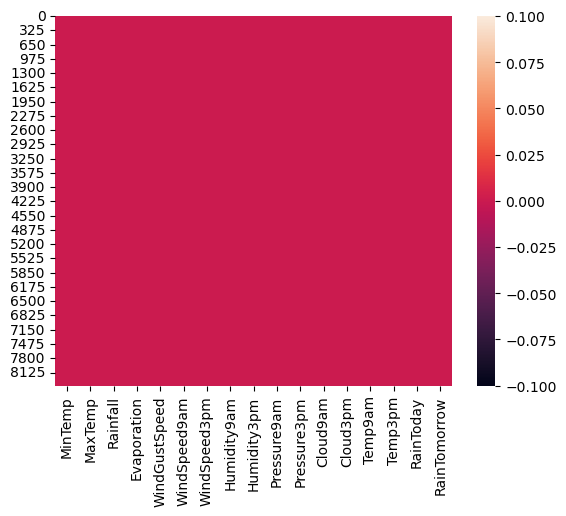

In [112]:
sns.heatmap(df.isnull())

Created the heatmap for the null values

In [113]:
df=pd.get_dummies(df).astype(int)
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow,RainToday_No,RainToday_Yes
0,13,22,0,4,44,20,24,71,22,1007,1007,8,7,16,21,0,1,0
1,7,25,0,4,44,4,22,44,25,1010,1007,7,7,17,24,0,1,0
2,12,25,0,4,46,19,26,38,30,1007,1008,7,2,21,23,0,1,0
3,9,28,0,4,24,11,9,45,16,1017,1012,7,7,18,26,0,1,0
4,17,32,1,4,41,7,20,82,33,1010,1006,7,8,17,29,0,1,0


Need to create the dummy of the dataset so that all the categorical data will be converted into numerical data

In [114]:
df.skew()

MinTemp          -0.077161
MaxTemp           0.391300
Rainfall         13.401295
Evaporation      13.974164
WindGustSpeed     0.786153
WindSpeed9am      0.969604
WindSpeed3pm      0.510765
Humidity9am      -0.262767
Humidity3pm       0.110858
Pressure9am       0.195083
Pressure3pm      -0.170799
Cloud9am         -0.863322
Cloud3pm         -0.804407
Temp9am          -0.006698
Temp3pm           0.409463
RainTomorrow      1.241588
RainToday_No     -1.242362
RainToday_Yes     1.242362
dtype: float64

In [115]:
df['Rainfall'] = np.cbrt(df['Rainfall'])

In [116]:
df['RainToday_No'] = np.cbrt(df['RainToday_No'])

In [117]:
df['RainToday_Yes'] = np.cbrt(df['RainToday_Yes'])

Check the skewness from the dataset and remove the skewness from the dataset to proceed further

In [118]:
df.skew()

MinTemp          -0.077161
MaxTemp           0.391300
Rainfall          1.962875
Evaporation      13.974164
WindGustSpeed     0.786153
WindSpeed9am      0.969604
WindSpeed3pm      0.510765
Humidity9am      -0.262767
Humidity3pm       0.110858
Pressure9am       0.195083
Pressure3pm      -0.170799
Cloud9am         -0.863322
Cloud3pm         -0.804407
Temp9am          -0.006698
Temp3pm           0.409463
RainTomorrow      1.241588
RainToday_No     -1.242362
RainToday_Yes     1.242362
dtype: float64

In [119]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow,RainToday_No,RainToday_Yes
0,13,22,0.0,4,44,20,24,71,22,1007,1007,8,7,16,21,0,1.0,0.0
1,7,25,0.0,4,44,4,22,44,25,1010,1007,7,7,17,24,0,1.0,0.0
2,12,25,0.0,4,46,19,26,38,30,1007,1008,7,2,21,23,0,1.0,0.0
3,9,28,0.0,4,24,11,9,45,16,1017,1012,7,7,18,26,0,1.0,0.0
4,17,32,1.0,4,41,7,20,82,33,1010,1006,7,8,17,29,0,1.0,0.0


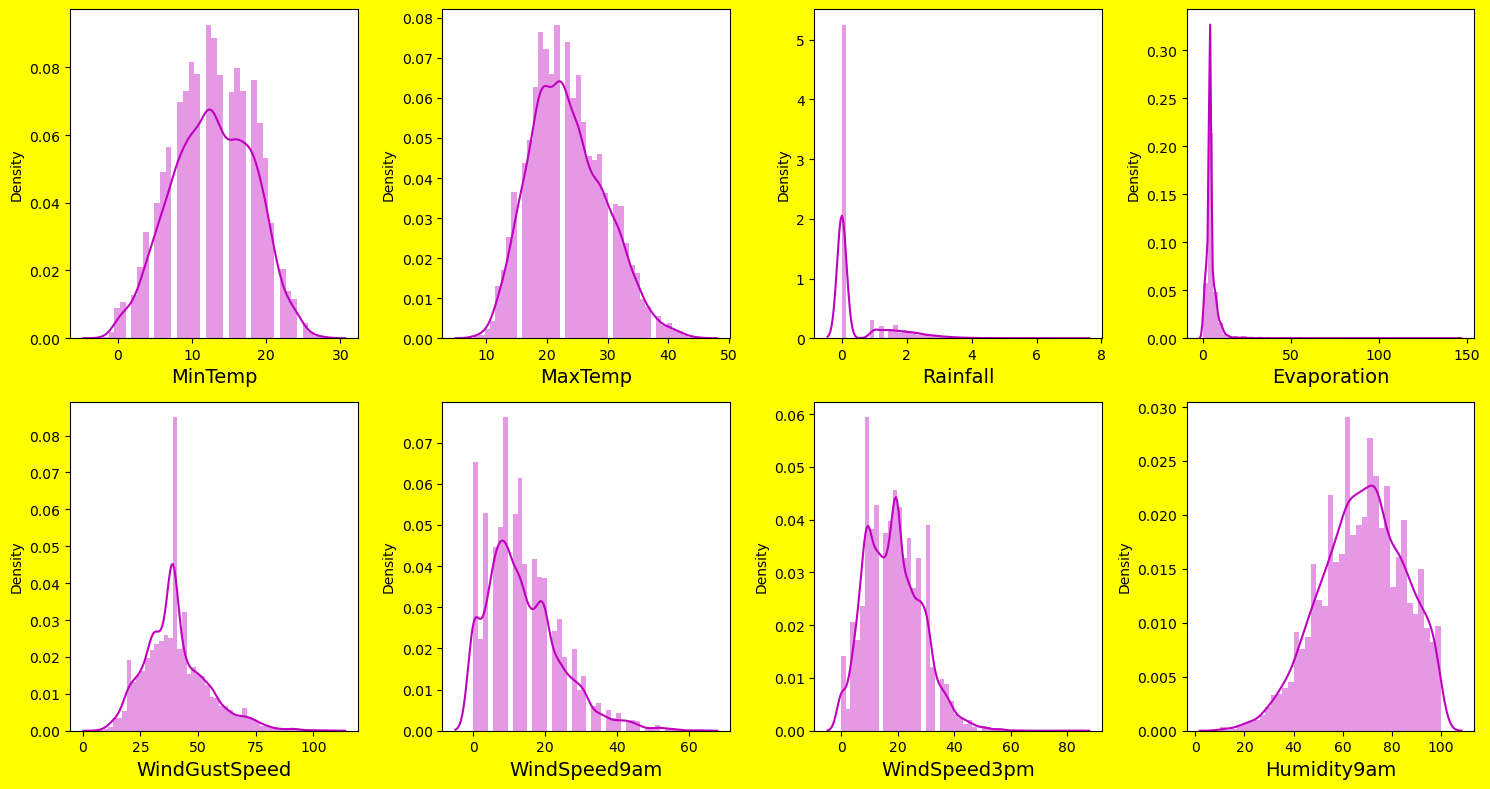

In [120]:
plt.figure(figsize=(15,8), facecolor= "yellow")
plotnumber=1
for col in df:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(df[col], color="m")
        plt.xlabel(col, fontsize = 14)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber+=1
        plt.tight_layout()

Created the distplot from the dataset to verify the skewness of the data

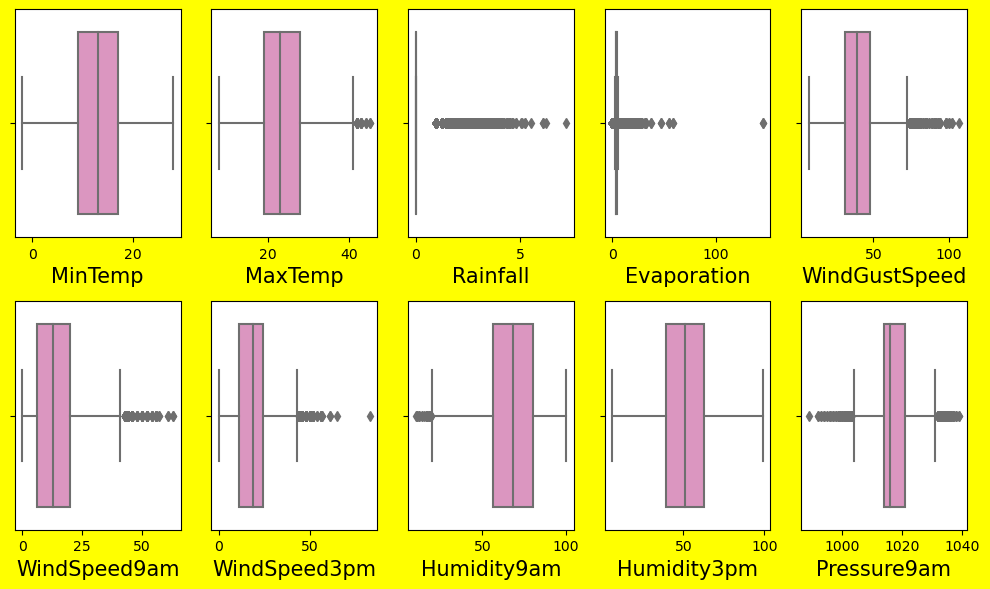

In [121]:
plt.figure(figsize=(10,6), facecolor= 'yellow')
plotnumber=1
for col in df:
    if plotnumber<=10:
        ax=plt.subplot(2,5, plotnumber)
        sns.boxplot(df[col], palette="Set2_r")
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber+=1
    plt.tight_layout()

Created the subplot from the dataset to verify the outliers and skewness in the dataset

In [122]:
cor= df.corr()
cor

,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow,RainToday_No,RainToday_Yes
MinTemp,1.000000,0.714739,0.090812,0.263888,0.230113,0.136881,0.181298,-0.131522,0.077309,-0.407927,-0.427822,0.017067,-0.037545,0.884790,0.685898,0.093027,-0.063367,0.063367
MaxTemp,0.714739,1.000000,-0.194627,0.325921,0.141070,0.016389,0.092111,-0.391753,-0.422501,-0.312903,-0.401632,-0.241726,-0.242796,0.862585,0.971305,-0.150797,0.222957,-0.222957
Rainfall,0.090812,-0.194627,1.000000,-0.050609,0.095047,0.046260,0.022749,0.376657,0.365593,-0.112828,-0.041600,0.208163,0.165195,-0.064594,-0.202138,0.330697,-0.901430,0.901430
Evaporation,0.263888,0.325921,-0.050609,1.000000,0.149513,0.136684,0.126630,-0.241367,-0.171607,-0.161462,-0.193166,-0.092032,-0.122453,0.318685,0.317762,-0.061358,0.091372,-0.091372
WindGustSpeed,0.230113,0.141070,0.095047,0.149513,1.000000,0.605502,0.636197,-0.271896,-0.093647,-0.377076,-0.384081,-0.004122,0.031616,0.201462,0.102453,0.190274,-0.076890,0.076890
WindSpeed9am,0.136881,0.016389,0.046260,0.136684,0.605502,1.000000,0.563132,-0.358959,-0.111892,-0.105419,-0.180552,-0.034985,0.003334,0.109891,-0.000749,0.067943,-0.035755,0.035755
WindSpeed3pm,0.181298,0.092111,0.022749,0.126630,0.636197,0.563132,1.000000,-0.251335,-0.091665,-0.188190,-0.240917,-0.017971,-0.028342,0.187034,0.068740,0.055508,-0.016343,0.016343
Humidity9am,-0.131522,-0.391753,0.376657,-0.241367,-0.271896,-0.358959,-0.251335,1.000000,0.633913,0.112256,0.190573,0.348001,0.264800,-0.377633,-0.382143,0.271396,-0.373285,0.373285
Humidity3pm,0.077309,-0.422501,0.365593,-0.171607,-0.093647,-0.111892,-0.091665,0.633913,1.000000,-0.003275,0.072755,0.314862,0.319006,-0.131947,-0.490845,0.444347,-0.358895,0.358895
Pressure9am,-0.407927,-0.312903,-0.112828,-0.161462,-0.377076,-0.105419,-0.188190,0.112256,-0.003275,1.000000,0.913243,-0.054903,-0.065978,-0.385760,-0.274066,-0.162046,0.103458,-0.103458


Need to check the correlation in the dataset

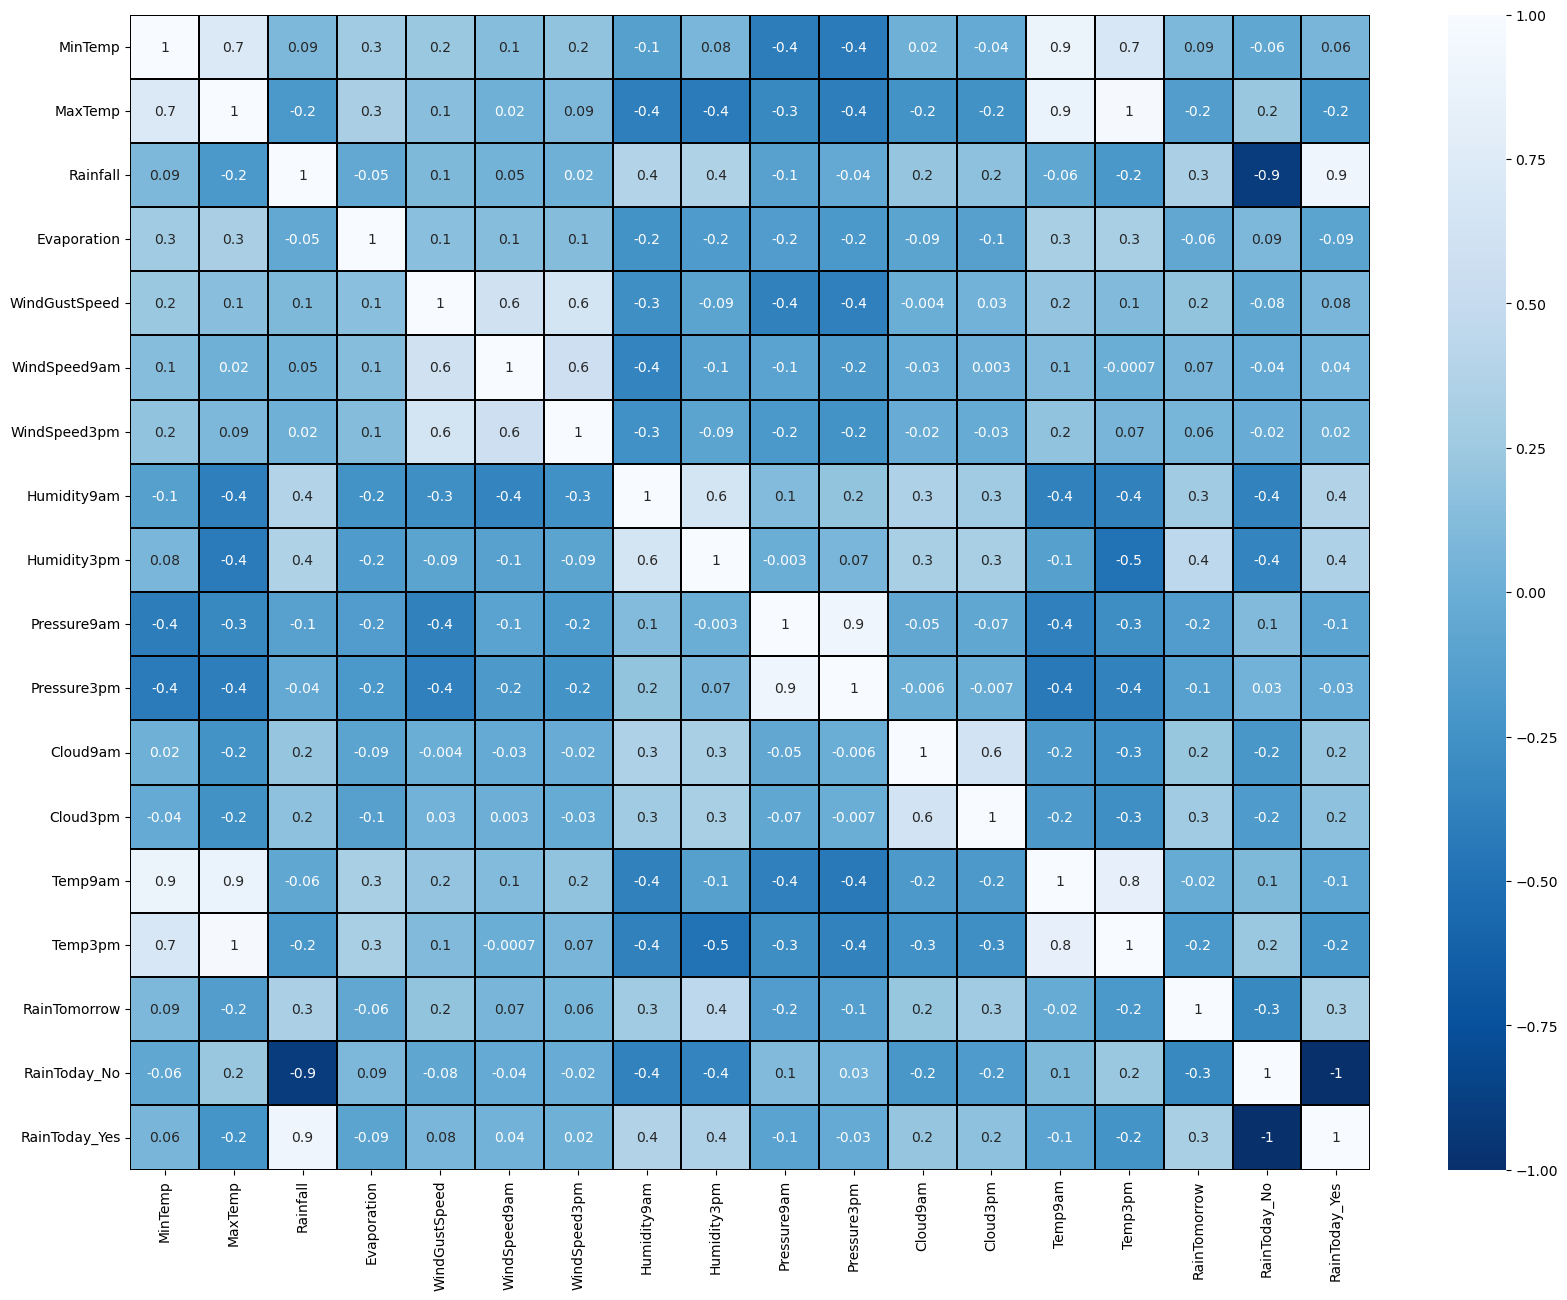

In [123]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), linewidths=0.1, fmt=".1g", linecolor="black", annot= True, cmap= "Blues_r")
plt.yticks(rotation=0);
plt.show()

Here we have created the heatmap to check the correlation between the dataset 

In [126]:
y=df['Rainfall']
x=df.drop(columns=['Rainfall','RainTomorrow'])

In [127]:
y_tmrw=df['RainTomorrow']
x_tmrw=df.drop(columns=['Rainfall','RainTomorrow'])

Drop the target variables into x axis to proceed with data further

In [128]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,MinTemp,MaxTemp,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_No,RainToday_Yes
0,0.047413,-0.226352,-0.151286,0.287630,0.611153,0.572321,0.187215,-1.599484,-1.518907,-1.295571,1.025166,0.690047,-0.230596,-0.162771,0.556099,-0.556099
1,-1.069947,0.262961,-0.151286,0.287630,-0.967014,0.367461,-1.421959,-1.435688,-1.048845,-1.295571,0.650214,0.690047,-0.052687,0.341093,0.556099,-0.556099
2,-0.138813,0.262961,-0.151286,0.432763,0.512518,0.777182,-1.779553,-1.162693,-1.518907,-1.136153,0.650214,-1.260055,0.658951,0.173138,0.556099,-0.556099
3,-0.697493,0.752273,-0.151286,-1.163698,-0.276566,-0.964134,-1.362360,-1.927077,0.047964,-0.498481,0.650214,0.690047,0.125223,0.677002,0.556099,-0.556099
4,0.792320,1.404689,-0.151286,0.069931,-0.671107,0.162600,0.842805,-0.998897,-1.048845,-1.454989,0.650214,1.080067,-0.052687,1.180866,0.556099,-0.556099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,-2.001080,-0.063248,-0.151286,-0.655733,-0.079295,-0.759274,-1.004766,-1.490286,1.144773,0.776862,0.650214,0.690047,-1.298052,0.005183,0.556099,-0.556099
8421,-1.814853,0.262961,-0.151286,-1.308831,-0.079295,-0.964134,-0.706770,-1.654083,0.988086,0.617444,0.650214,0.690047,-1.298052,0.341093,0.556099,-0.556099
8422,-1.442400,0.426065,-0.151286,-0.220335,-0.473836,-0.964134,-0.885568,-1.490286,0.674712,0.139190,0.650214,0.690047,-0.942233,0.677002,0.556099,-0.556099
8423,-1.069947,0.589169,-0.151286,-0.873433,-0.079295,-1.168995,-1.004766,-1.490286,0.361338,0.139190,-0.849595,-1.260055,-0.408505,0.677002,0.556099,-0.556099


In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [130]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,7.436780,MinTemp
1,22.373160,MaxTemp
2,1.159432,Evaporation
3,2.365299,WindGustSpeed
4,2.111291,WindSpeed9am
5,1.934687,WindSpeed3pm
6,3.717549,Humidity9am
7,5.112176,Humidity3pm
8,7.232100,Pressure9am
9,7.296310,Pressure3pm


In [131]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix, roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [132]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Created the linear regression model for this dataset to get the predicted the target variable

In [133]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error: 0.14628447467265127
R-squared (R2) Score: 0.8101364704254737


In [134]:
import joblib
joblib.dump(model,"Rainfall.pkl")

['Rainfall.pkl']

In [135]:
model = joblib.load("Rainfall.pkl")
prediction = model.predict(X_test)
prediction

array([ 0.03098263,  0.12429404, -0.06721774, ...,  0.11086127,
       -0.02935124,  0.00409637])

In [136]:
a = np.array(y_test) 
df = pd.DataFrame()
df["Predicted"] = prediction
df["Original"]=a
df

,Predicted,Original
0,0.030983,0.000000
1,0.124294,0.000000
2,-0.067218,0.000000
3,-0.059028,0.000000
4,0.004914,0.000000
...,...,...
1680,1.972655,1.817121
1681,0.131753,0.000000
1682,0.110861,0.000000
1683,-0.029351,0.000000


Here we have predicted the 1st target variable which is rainfall in the dataset

In [138]:
from sklearn.model_selection import train_test_split

X_train_tmrw, X_test_tmrw, y_train_tmrw, y_test_tmrw= train_test_split(x_tmrw, y_tmrw, test_size=0.2, random_state=42)

In [140]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x_tmrw.values, i) for i in range(len(x.columns))]
vif["Features"]=x_tmrw.columns
vif

,VIF values,Features
0,7.436780,MinTemp
1,22.373160,MaxTemp
2,1.159432,Evaporation
3,2.365299,WindGustSpeed
4,2.111291,WindSpeed9am
5,1.934687,WindSpeed3pm
6,3.717549,Humidity9am
7,5.112176,Humidity3pm
8,7.232100,Pressure9am
9,7.296310,Pressure3pm


In [141]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix, roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [142]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_tmrw, y_train_tmrw)

LinearRegression()

Created the linear regression model for the 2 different target variables so that we can predict the 2 different values

In [143]:
y_pred_tmrw = model.predict(X_test_tmrw)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test_tmrw, y_pred_tmrw)
r2 = r2_score(y_test_tmrw, y_pred_tmrw)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error: 0.1169990735798165
R-squared (R2) Score: 0.3185830088479972


In [144]:
import joblib
joblib.dump(model,"RainTomorrow.pkl")

['RainTomorrow.pkl']

In [145]:
model = joblib.load("RainTomorrow.pkl")
prediction = model.predict(X_test)
prediction

array([4.8731226 , 4.91905872, 4.91115449, ..., 4.93398375, 4.91922459,
       4.87910428])

In [146]:
a = np.array(y_test) 
df = pd.DataFrame()
df["Predicted"] = prediction
df["Original"]=a
df

,Predicted,Original
0,4.873123,0.000000
1,4.919059,0.000000
2,4.911154,0.000000
3,4.913975,0.000000
4,4.903714,0.000000
...,...,...
1680,5.278615,1.817121
1681,4.916458,0.000000
1682,4.933984,0.000000
1683,4.919225,0.000000


Here we have predicted the raintomorrow target variable for the rainfall weather forecasting